In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
import joblib
import nltk
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, fbeta_score, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

ss=SnowballStemmer("english")
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/BRAINWARE UNIVERSITY /Sumsung Innovation Campus/Project /spam.csv'

In [ ]:
# Read the dataset using pandas
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])
df.shape

(5572, 2)

In [ ]:
# For printing the first 5 rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
stop  # By the use of this we were able to know about the total stop words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### **Exploratory Data Analysis**



In [ ]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


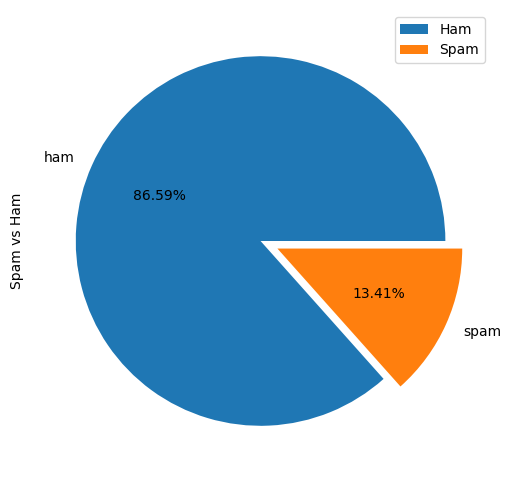

In [ ]:
# Plot Pie Chart
df["label"].value_counts().plot(kind ='pie', explode=[0, 0.1], figsize=(6, 6), autopct= '%1.2f%%')
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

### **Data Preprocessing**

In [ ]:
df.groupby("message") ["label"].agg([len, np.max]).sort_values(by = "len", ascending = False).head (n = 10)

,len,max
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Ok.,4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!,4,spam
Ok,4,ham
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st ""Ur Lovely Friendship""... good morning dear",4,ham


In [ ]:
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.length.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [ ]:
# View The message whose length is 910
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

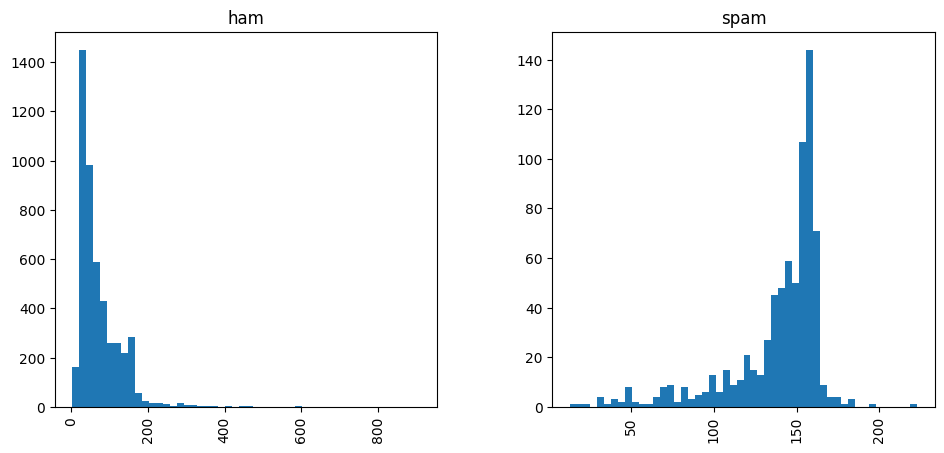

In [ ]:
# Draw the histogram
df.hist(column='length', by='label', bins=50, figsize=(11,5))

From the Histogram we are able to know that it Looks like a lengthy message, more likely it is a spam Mail..

### **Text Transformation**
Data Cleaning (Removing unimportant data/ Stopwords/ Stemming)

In [ ]:
import string
def cleanText(message):
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    words = [ss.stem(word) for word in message if word not in stop]
    return " ".join(words)
df["message"] = df["message"].apply(cleanText)
df.head(n = 10)

,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
5,spam,freemsg hey darl week word back like fun still...,147
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea pri...,157
9,spam,mobil month u r entitl updat latest colour mob...,154


In [ ]:
spam_messages = df[df["label"] == "spam"]["message"]
ham_messages = df[df["label"] == "ham"]["message"]

In [ ]:
spam_messages.head(7)

,message
2,free entri wkli comp win fa cup final tkts st ...
5,freemsg hey darl week word back like fun still...
8,winner valu network custom select receivea pri...
9,mobil month u r entitl updat latest colour mob...
11,six chanc win cash pound txt csh send cost p d...
12,urgent week free membership prize jackpot txt ...
15,xxxmobilemovieclub use credit click wap link n...


In [ ]:
ham_messages.head(7)

,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
6,even brother like speak treat like aid patent
7,per request mell mell oru minnaminungint nurun...
10,gonna home soon want talk stuff anymor tonight...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')
spam_words = []
ham_words = []
def extractSpamwords (spamMessages):
    global spam_words
    words = [word for word in word_tokenize (spamMessages)]
    spam_words = spam_words + words
def extractHamWords (hamMessages):
    global ham_words
    words = [word for word in word_tokenize (hamMessages) ]
    ham_words = ham_words + words
spam_messages.apply(extractSpamwords)
ham_messages.apply(extractHamWords)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,message
0,None
1,None
3,None
4,None
6,None
...,...
5565,None
5568,None
5569,None
5570,None


### **Draw WordCloud to view which one is most using spam words**

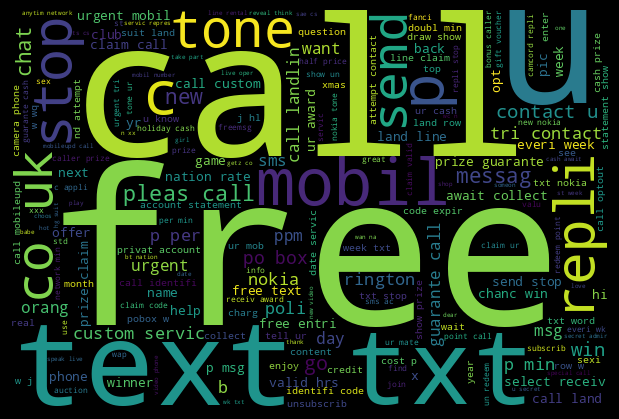

In [ ]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=600 , height=400).generate(" ".join(spam_words))
plt.figure(figsize=(6,4), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

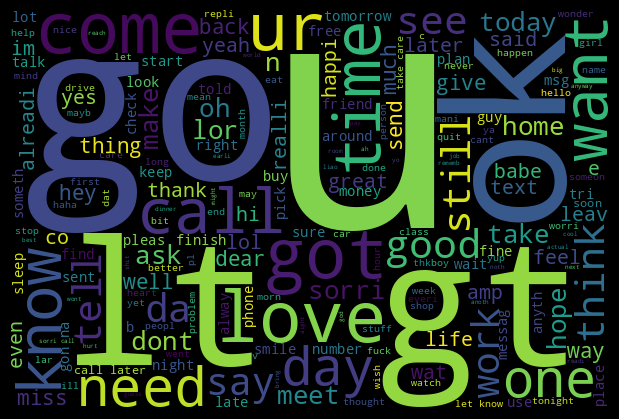

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(6,4), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df

,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
...,...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...,160
5568,ham,b go esplanad fr home,36
5569,ham,piti mood suggest,57
5570,ham,guy bitch act like interest buy someth els nex...,125


In [ ]:
# Convert text into number

def encodeCategory(cat):
  if cat=="spam":
    return 1
  else:
    return 0
df["label"] = df["label"].apply(encodeCategory)

In [ ]:
df

,label,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkts st ...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,nd time tri contact u u pound prize claim easi...,160
5568,0,b go esplanad fr home,36
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer (encoding = "latin-1", strip_accents = "unicode")
features = vec.fit_transform(df["message"])
print(features.shape)

(5572, 6292)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(df["message"])
print (X.shape)

(5572, 6292)


In [ ]:
cv = CountVectorizer()
X=cv.fit(df["message"])
X.vocabulary_
X.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zouk', 'zs', 'zyada'], dtype=object)

In [ ]:
X= cv.fit_transform(df["message"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data = pd.DataFrame(X, columns=cv.get_feature_names_out(), index=df.index)

data['length'] = df['length']
data['label'] = df['label']
df = data
df.head()

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df["label"]
y.head(7)

,label
0,0
1,0
2,1
3,0
4,0
5,1
6,0


### **Training model using Naive bayes classifier**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("F1 Score:",fbeta_score(y_test, y_pred, beta=0.5))

Accuracy Score: 0.9775784753363229
F1 Score: 0.8971141781681304


In [ ]:
print("Clasification Report:\n",classification_report(y_test, y_pred))

Clasification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.88      0.96      0.92       149

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
saved_model=pickle.dumps(spam_detect_model)

In [ ]:
modelfrom_pickle = pickle.loads (saved_model)

In [ ]:
y_pred=modelfrom_pickle.predict(X_test)


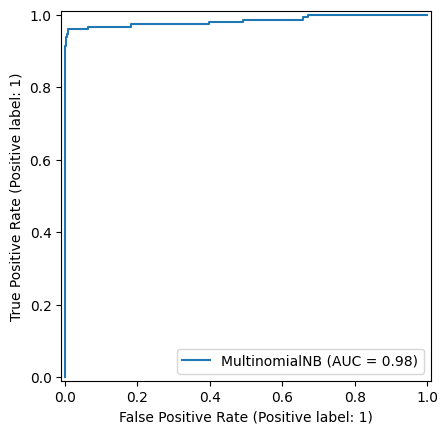

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(spam_detect_model, X_test, y_test)
plt.show()

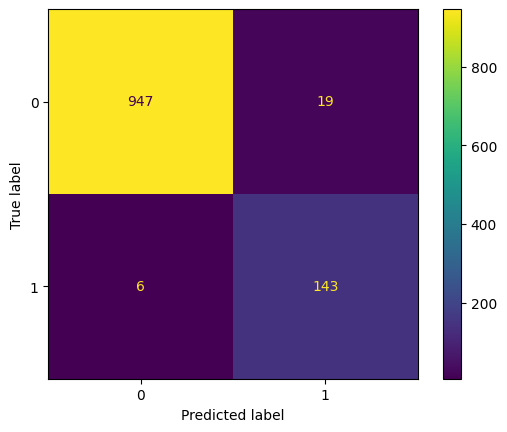

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = spam_detect_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [ ]:
joblib.dump(spam_detect_model, 'spam_detect_model.pkl')

['spam_detect_model.pkl']

In [ ]:
joblib.dump(X , 'transform.pkl')

['transform.pkl']